Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
!pip install category_encoders==2.*

     |████████████████████████████████| 82 kB 277 kB/s 


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve,roc_auc_score, mean_absolute_error

In [6]:
%cd /content/drive/MyDrive/DATA_SCHOOL_FILES/LAMBDA/UNIT_2_(Predictive_Modeling)/Unit 2.3

/content/drive/MyDrive/DATA_SCHOOL_FILES/LAMBDA/UNIT_2_(Predictive_Modeling)/Unit 2.3


In [7]:
!ls

'Life Expectancy Data.csv'  'Module 1 - Define ML Problems'


In [95]:
df = pd.read_csv('Life Expectancy Data.csv',
                 parse_dates=['Year']).set_index('Year')

df = df.loc[df['Life expectancy '].notnull()]

In [96]:
df.nunique()

Country                             183
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2323
Hepatitis B                          87
Measles                             958
 BMI                                602
under-five deaths                   252
Polio                                73
Total expenditure                   816
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2485
Population                         2277
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [97]:
df.isnull().sum()

Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

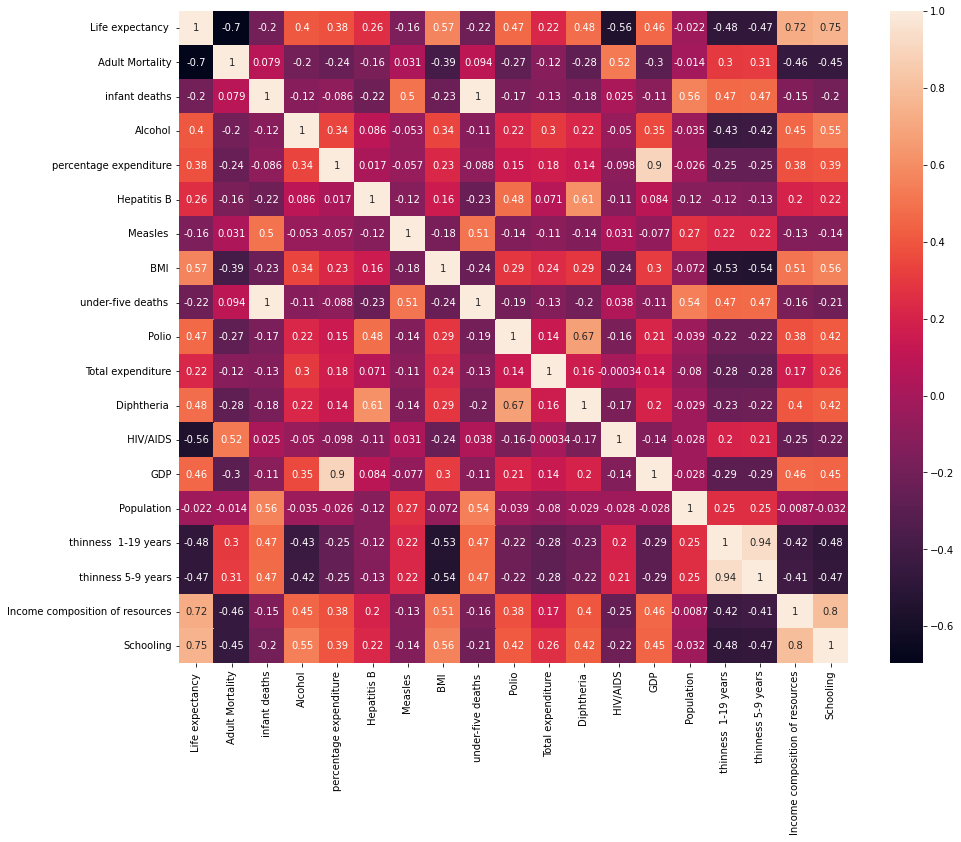

In [100]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

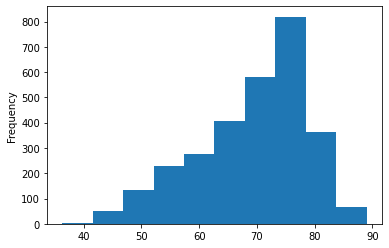

In [101]:
df['Life expectancy '].plot(kind='hist')

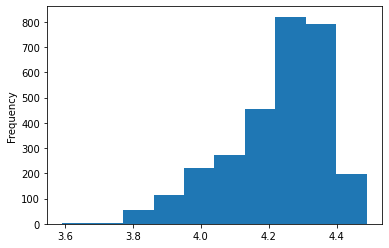

In [102]:
np.log(df['Life expectancy ']).plot(kind='hist')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2928 entries, 2015-01-01 to 2000-01-01
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Status                           2928 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2928 non-null   int64  
 5   Alcohol                          2735 non-null   float64
 6   percentage expenditure           2928 non-null   float64
 7   Hepatitis B                      2375 non-null   float64
 8   Measles                          2928 non-null   int64  
 9    BMI                             2896 non-null   float64
 10  under-five deaths                2928 non-null   int64  
 11  Polio                            2909 non-null   float64
 12  To

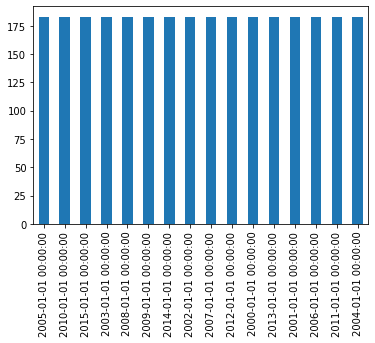

In [104]:
df.index.value_counts().plot(kind='bar')

In [105]:
X = df.drop(columns='Life expectancy ')
y = df['Life expectancy ']


mask_train = df.index < '2012'
mask_val = (df.index >= '2012') & (df.index <= '2013')
mask_test = (df.index >= '2014')

X_train = X.loc[mask_train]
y_train = y.loc[mask_train]

X_val = X.loc[mask_val]
y_val = y.loc[mask_val]

X_test = X.loc[mask_test]
y_test = y.loc[mask_test]

In [106]:
#Baseline 

y_pred = [y_train.mean()] * len(y_train)

print('Baseline MAE:', mean_absolute_error(y_train,y_pred) )

Baseline MAE: 8.038445791487067


In [110]:
model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    LinearRegression()

)

model.fit(X_train,y_train);

In [112]:
print('Train MAE:', mean_absolute_error(y_train,model.predict(X_train)) )
print()
print('Validation MAE:', mean_absolute_error(y_val,model.predict(X_val)) )
print()
print('Test MAE:', mean_absolute_error(y_test,model.predict(X_test)) )

Train MAE: 1.1933859916482312

Validation MAE: 1.751055420963542

Test MAE: 2.0005066359293093
